In [1]:
import yaml
import numpy as np

from scipy.interpolate import SmoothBivariateSpline

import sys
sys.path.append("../")

from electronfactors.ellipse.equivalent import EquivalentEllipse

In [2]:
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

import descartes as des

In [3]:
energy = 12
applicator = 10
ssd = 100

filepath = (
    "output/model_cache_" + 
    str(energy) + "MeV_" + 
    str(applicator) + "app_" + 
    str(ssd) + "ssd.yml"
)

In [4]:
with open(filepath, 'r') as inputFile:
    input_dict = yaml.load(inputFile)

In [5]:
width = np.zeros(len(input_dict))
length = np.zeros(len(input_dict))
factor = np.zeros(len(input_dict))
label = [0] * len(input_dict)
poi = [0] * len(input_dict)

for i, key in enumerate(input_dict):
    width[i] = input_dict[key]['width']
    length[i] = input_dict[key]['length']
    factor[i] = input_dict[key]['factor']
    label[i] = key
    poi[i] = input_dict[key]['poi']
    
ratio = width/length
eqPonA = 2*( 3*(ratio+1) - np.sqrt( (3*ratio+1)*(ratio+3) ) ) / width

bivariateSpline = SmoothBivariateSpline(width,eqPonA,factor,kx=2,ky=2)

def circle_fit(radii):
    
    if radii >= 1.5:
        result = bivariateSpline.ev(radii*2, 2/radii)
        
    else:
        result = 0.
               
    return result

In [6]:
output_dict = dict()
equivalentEllipse = dict()

In [7]:
def plot_equivalent_ellipse(eqEllipseObject):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    patch = des.PolygonPatch(eqEllipseObject.centredCutout, fc=np.random.uniform(size=3), alpha=0.3)
    ax.add_patch(patch)

    patch = des.PolygonPatch(eqEllipseObject.straightenedCutout, fc=np.random.uniform(size=3), alpha=0.3)
    ax.add_patch(patch)

    patch = des.PolygonPatch(eqEllipseObject.eqEllipse, fc=np.random.uniform(size=3), alpha=0.5)
    ax.add_patch(patch)

    plt.scatter(0,0)
    ax.axis("equal")
    
    plt.title(str(key))
    plt.show()

In [8]:
def predicted_factor(width, length):
    
    ratio = width/length
    eqPonA = 2*( 3*(ratio+1) - np.sqrt( (3*ratio+1)*(ratio+3) ) ) / width
    
    return bivariateSpline.ev(width, eqPonA)

Progress: 2.4%

Simon #33 cutout:
    Width: 5.89 (5.89)
    Length: 6.21 (6.21)
    Predicted Factor: 0.9884 (0.9884)



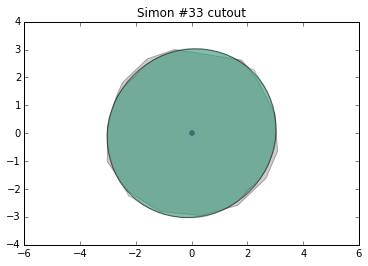

Progress: 4.8%

Simon #20 cutout:
    Width: 4.25 (4.25)
    Length: 5.13 (5.13)
    Predicted Factor: 0.9618 (0.9618)



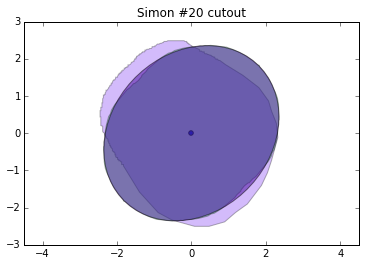

Progress: 7.1%

Simon 3x6.5cm oval:
    Width: 3.00 (3.00)
    Length: 6.51 (6.51)
    Predicted Factor: 0.9436 (0.9435)



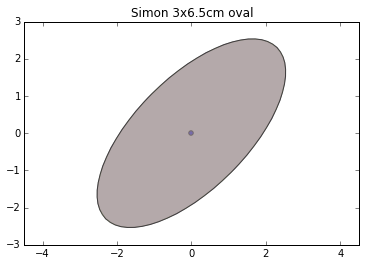

Progress: 9.5%

Simon 5x8cm oval:
    Width: 5.01 (5.01)
    Length: 8.01 (8.01)
    Predicted Factor: 0.9825 (0.9826)



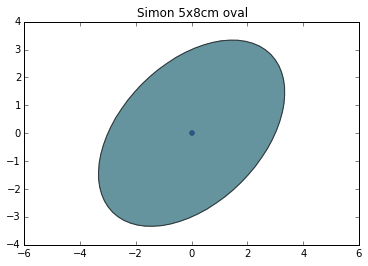

Progress: 11.9%

Simon 4x10cm oval:
    Width: 4.00 (4.00)
    Length: 10.00 (10.00)
    Predicted Factor: 0.9721 (0.9720)



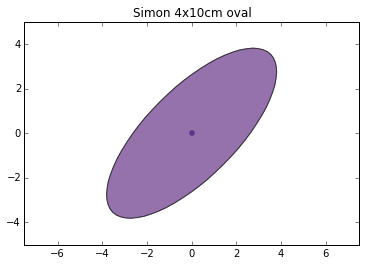

Progress: 14.3%

Simon #58 cutout:
    Width: 5.85 (5.85)
    Length: 7.46 (7.45)
    Predicted Factor: 0.9909 (0.9909)



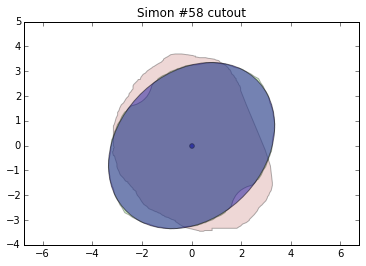

Progress: 16.7%

Simon #32 cutout:
    Width: 7.66 (7.66)
    Length: 11.26 (11.25)
    Predicted Factor: 1.0055 (1.0055)



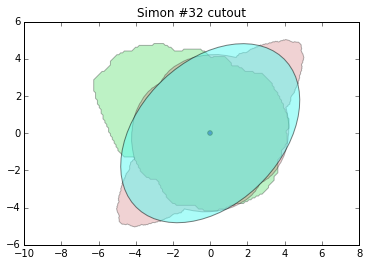

Progress: 19.0%

Simon #106 cutout:
    Width: 6.06 (6.07)
    Length: 9.71 (9.71)
    Predicted Factor: 0.9976 (0.9976)



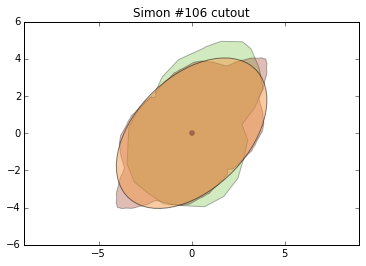

Progress: 21.4%

Simon #14 cutout:
    Width: 4.38 (4.38)
    Length: 5.28 (5.27)
    Predicted Factor: 0.9643 (0.9644)



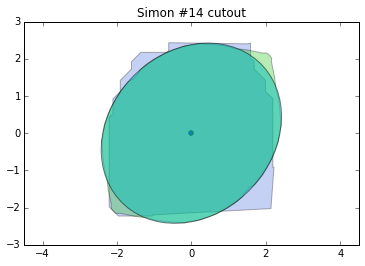

Progress: 23.8%

Simon #16 cutout:
    Width: 6.01 (6.01)
    Length: 10.48 (10.48)
    Predicted Factor: 0.9984 (0.9984)



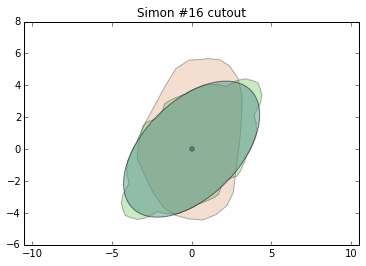

Progress: 26.2%

Simon #6 cutout:
    Width: 6.95 (6.95)
    Length: 10.67 (10.67)
    Predicted Factor: 1.0041 (1.0041)



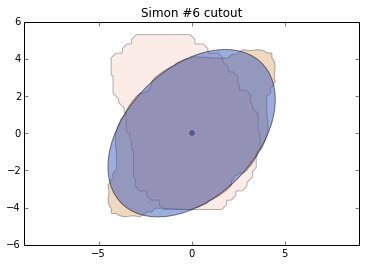

Progress: 28.6%

Simon 4x13cm oval:
    Width: 4.01 (4.01)
    Length: 13.01 (13.01)
    Predicted Factor: 0.9761 (0.9762)



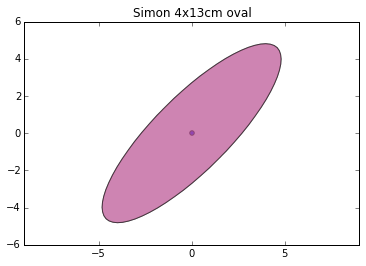

Progress: 31.0%

Simon #104 cutout:
    Width: 5.62 (5.62)
    Length: 8.33 (8.33)
    Predicted Factor: 0.9906 (0.9906)



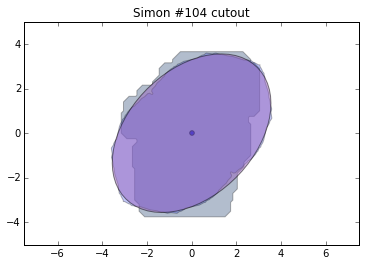

Progress: 33.3%

Simon #73 cutout:
    Width: 7.29 (7.29)
    Length: 9.08 (9.06)
    Predicted Factor: 1.0044 (1.0044)



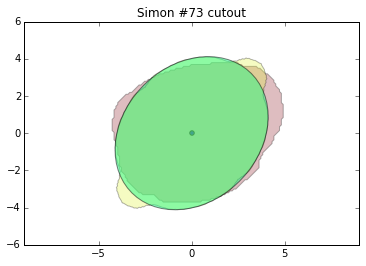

Progress: 35.7%

Simon #34 cutout:
    Width: 6.89 (6.89)
    Length: 9.94 (9.94)
    Predicted Factor: 1.0032 (1.0032)



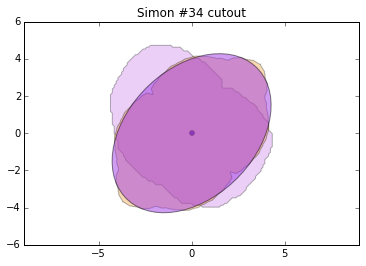

Progress: 38.1%

Simon #70 cutout:
    Width: 7.44 (7.44)
    Length: 8.36 (8.36)
    Predicted Factor: 1.0050 (1.0050)



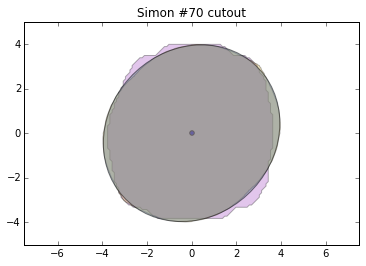

Progress: 40.5%

Simon 3x5cm oval:
    Width: 3.01 (3.01)
    Length: 5.00 (5.00)
    Predicted Factor: 0.9382 (0.9383)



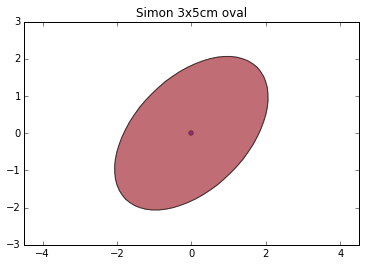

Progress: 42.9%

Simon 3cm circle:
    Width: 2.99 (2.99)
    Length: 3.00 (3.00)
    Predicted Factor: 0.9298 (0.9298)



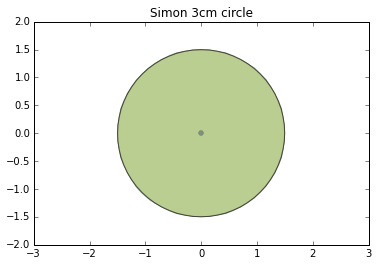

Progress: 45.2%

Simon #38 cutout:
    Width: 4.64 (4.64)
    Length: 5.72 (5.72)
    Predicted Factor: 0.9699 (0.9700)



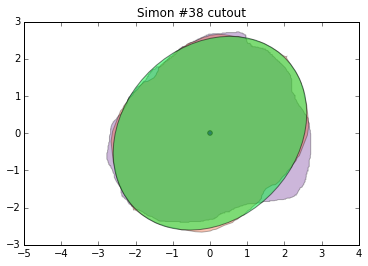

Progress: 47.6%

Simon 8cm circle:
    Width: 8.00 (8.00)
    Length: 8.00 (8.00)
    Predicted Factor: 1.0080 (1.0080)



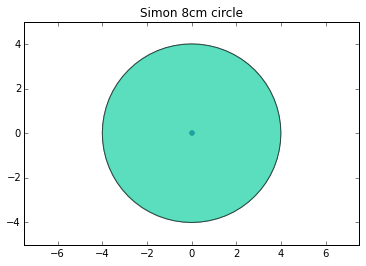

Progress: 50.0%

Simon #43 cutout:
    Width: 6.09 (6.09)
    Length: 7.72 (7.73)
    Predicted Factor: 0.9941 (0.9940)



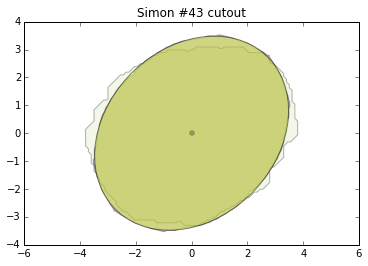

Progress: 52.4%

Simon #83 cutout:
    Width: 5.78 (5.77)
    Length: 7.93 (7.91)
    Predicted Factor: 0.9913 (0.9912)



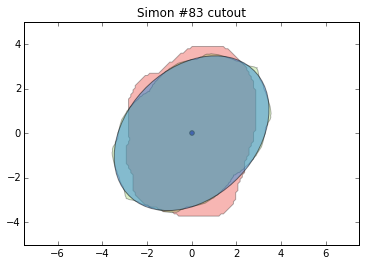

Progress: 54.8%

Simon #82 cutout:
    Width: 6.25 (6.25)
    Length: 7.94 (7.94)
    Predicted Factor: 0.9960 (0.9960)



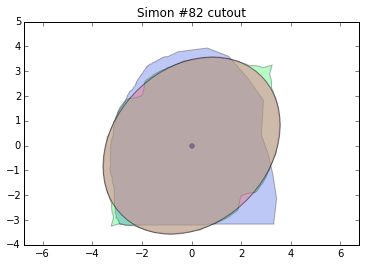

Progress: 57.1%

Simon 4x8cm oval:
    Width: 4.00 (4.00)
    Length: 8.01 (8.01)
    Predicted Factor: 0.9678 (0.9678)



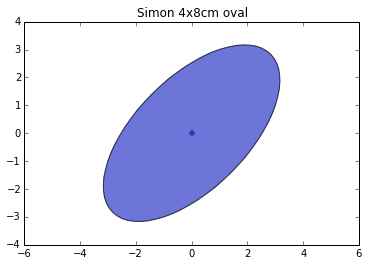

Progress: 59.5%

Simon 5x13cm oval:
    Width: 5.01 (5.01)
    Length: 13.00 (13.00)
    Predicted Factor: 0.9916 (0.9916)



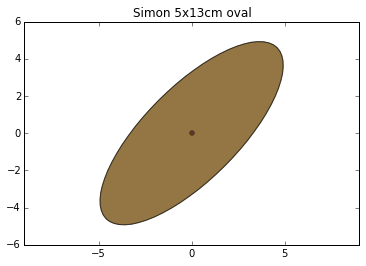

Progress: 61.9%

Simon 5cm circle:
    Width: 5.00 (5.00)
    Length: 5.00 (5.00)
    Predicted Factor: 0.9726 (0.9726)



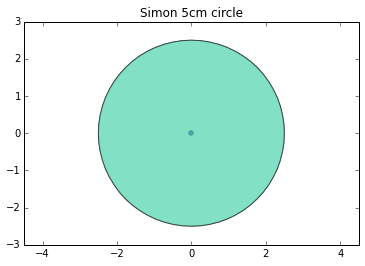

Progress: 64.3%

Simon #18 cutout:
    Width: 7.59 (7.59)
    Length: 9.98 (9.99)
    Predicted Factor: 1.0054 (1.0054)



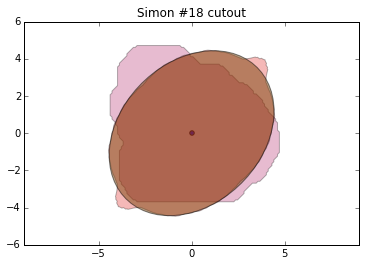

Progress: 66.7%

Simon 4cm circle:
    Width: 3.98 (3.98)
    Length: 4.00 (4.00)
    Predicted Factor: 0.9533 (0.9533)



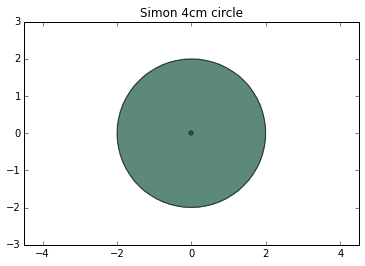

Progress: 69.0%

Simon #3 cutout:
    Width: 4.48 (4.48)
    Length: 6.09 (6.08)
    Predicted Factor: 0.9691 (0.9690)



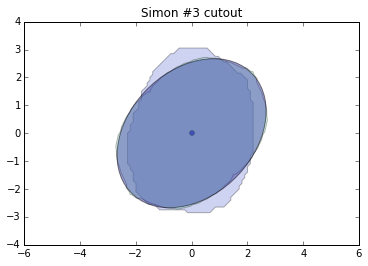

Progress: 71.4%

Simon #19 cutout:
    Width: 5.58 (5.59)
    Length: 10.74 (10.72)
    Predicted Factor: 0.9949 (0.9950)



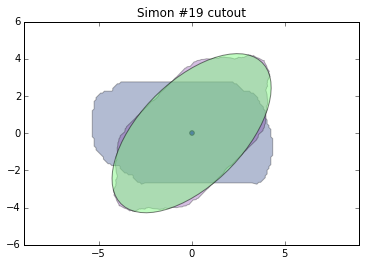

Progress: 73.8%

Simon 6cm circle:
    Width: 6.00 (6.00)
    Length: 6.00 (6.00)
    Predicted Factor: 0.9893 (0.9893)



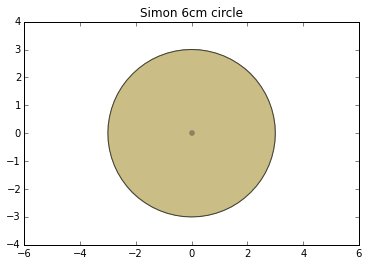

Progress: 76.2%

Simon #22 cutout:
    Width: 5.12 (5.12)
    Length: 10.31 (10.31)
    Predicted Factor: 0.9891 (0.9891)



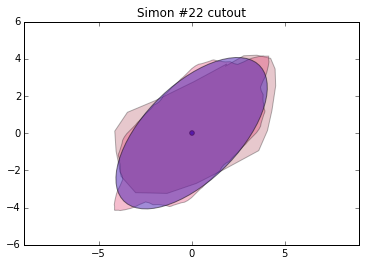

Progress: 78.6%

Simon #41 cutout:
    Width: 6.82 (6.82)
    Length: 10.12 (10.12)
    Predicted Factor: 1.0031 (1.0031)



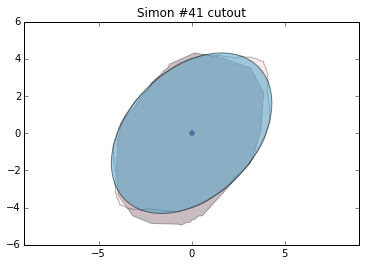

Progress: 81.0%

Simon 3x13cm oval:
    Width: 3.00 (3.00)
    Length: 13.01 (13.01)
    Predicted Factor: 0.9536 (0.9535)



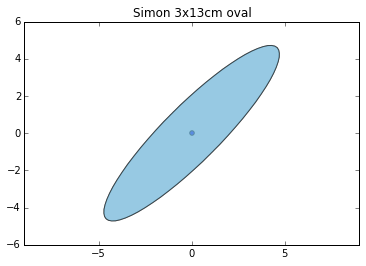

Progress: 83.3%

Simon 4x6.5cm oval:
    Width: 4.00 (4.00)
    Length: 6.51 (6.51)
    Predicted Factor: 0.9633 (0.9633)



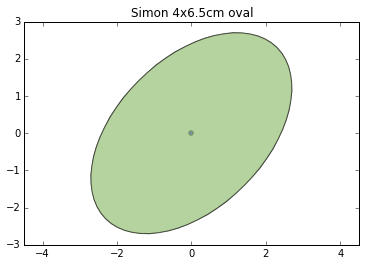

Progress: 85.7%

Simon 7cm circle:
    Width: 7.00 (7.00)
    Length: 7.00 (7.00)
    Predicted Factor: 1.0017 (1.0017)



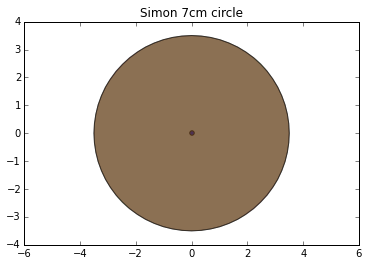

Progress: 88.1%

Simon #57 cutout:
    Width: 3.57 (3.56)
    Length: 4.60 (4.62)
    Predicted Factor: 0.9482 (0.9482)



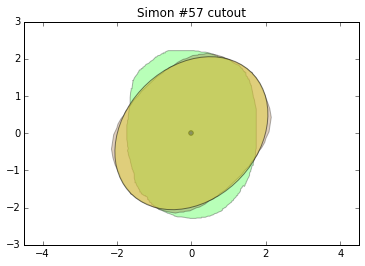

Progress: 90.5%

Simon 5x10cm oval:
    Width: 5.01 (5.01)
    Length: 10.00 (10.00)
    Predicted Factor: 0.9871 (0.9871)



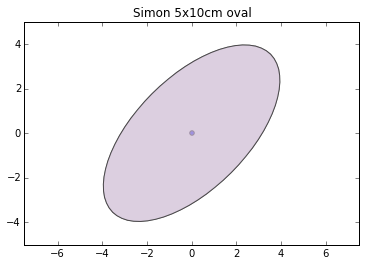

Progress: 92.9%

Simon #112 cutout:
    Width: 3.54 (3.54)
    Length: 4.14 (4.14)
    Predicted Factor: 0.9458 (0.9458)



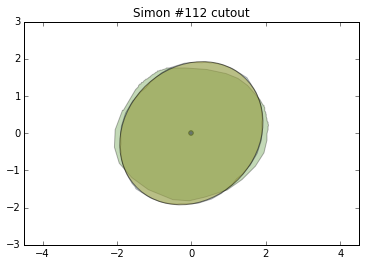

Progress: 95.2%

Simon 9cm circle:
    Width: 9.00 (9.00)
    Length: 9.00 (9.00)
    Predicted Factor: 1.0065 (1.0065)



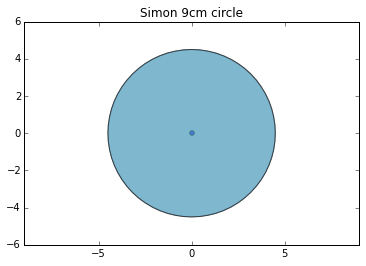

Progress: 97.6%

Simon 3x9cm oval:
    Width: 3.00 (3.00)
    Length: 9.01 (9.01)
    Predicted Factor: 0.9492 (0.9491)



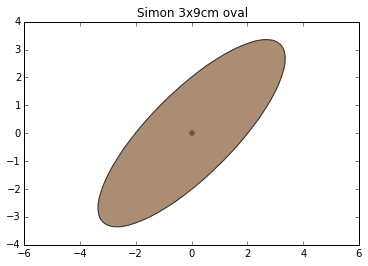

Progress: 100.0%

Simon #109 cutout:
    Width: 6.31 (6.31)
    Length: 7.81 (7.81)
    Predicted Factor: 0.9963 (0.9963)



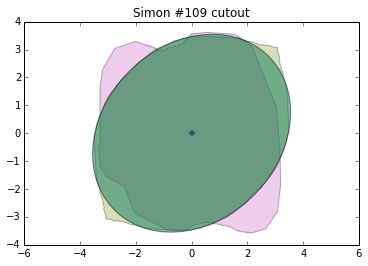

In [9]:
for i, key in enumerate(label):
    XCoords = input_dict[key]['XCoords']
    YCoords = input_dict[key]['YCoords']
    
    equivalentEllipse[key] = EquivalentEllipse(
        x=XCoords, y=YCoords, 
        circle_fit=circle_fit, n=5, 
        min_distance=1.49,
        poi=poi[i]
    )
    
    
    output_dict[key] = dict()
    width = equivalentEllipse[key].width
    length = equivalentEllipse[key].length
    
    output_dict[key]['width'] = width
    output_dict[key]['length'] = length
    
    width_old = input_dict[key]['width']
    length_old = input_dict[key]['length']
    
    
    
    factor = predicted_factor(width, length)
    factor_old = predicted_factor(width_old, length_old)
    
    print("Progress: %0.1f%%\n" % (100*(i+1) / len(label),))
    print(
        str(key) + ":\n"
        "    Width: %0.2f (%0.2f)\n"
        "    Length: %0.2f (%0.2f)\n"
        "    Predicted Factor: %0.4f (%0.4f)\n" % 
        (
            width, width_old, 
            length, length_old,
            factor, factor_old
        )
    )
    
    plot_equivalent_ellipse(equivalentEllipse[key])

In [10]:
for key in label:
    
    output_dict[key]['XCoords'] = input_dict[key]['XCoords']
    output_dict[key]['YCoords'] = input_dict[key]['YCoords']
    output_dict[key]['factor'] = input_dict[key]['factor']
    output_dict[key]['energy'] = input_dict[key]['energy']
    output_dict[key]['applicator'] = input_dict[key]['applicator']
    output_dict[key]['ssd'] = input_dict[key]['ssd']
    output_dict[key]['poi'] = input_dict[key]['poi']
    
    output_dict[key]['width'] = round(float(output_dict[key]['width']), 2)
    output_dict[key]['length'] = round(float(output_dict[key]['length']), 2)

In [11]:
width_diff = np.zeros(len(output_dict))
length_diff = width_diff.copy()

for i, key in enumerate(label):
    
    width_diff[i] = output_dict[key]['width'] - input_dict[key]['width']
    length_diff[i] = output_dict[key]['length'] - input_dict[key]['length']

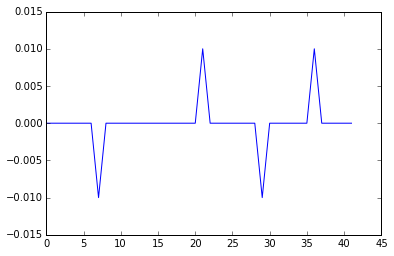

In [12]:
plt.plot(width_diff)

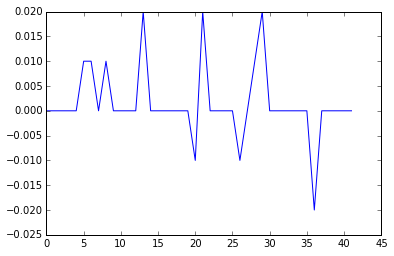

In [13]:
plt.plot(length_diff)

In [14]:
key = label[np.argmax(width_diff)]
key

'Simon #83 cutout'

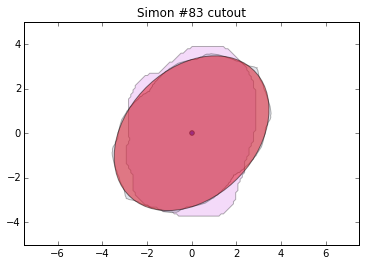

In [15]:
plot_equivalent_ellipse(equivalentEllipse[key])

In [16]:
with open(filepath, 'w') as outfile:
    outfile.write(yaml.dump(output_dict, default_flow_style=False))